r_c= 10.4122511482
v_inf= 208.35541145
Chi2= 42.8043689756
chi2_red= 2.25286152503


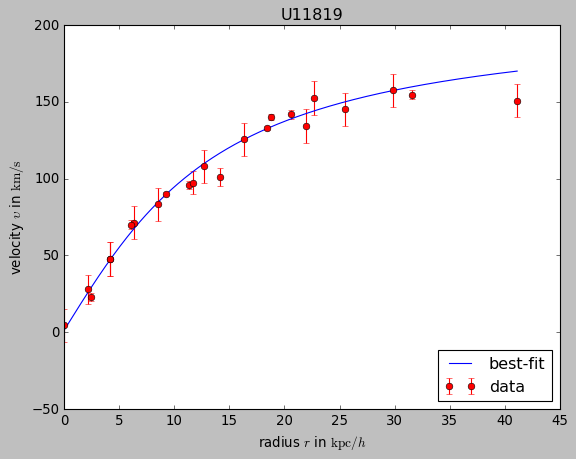

In [2]:
# rotfit.py - fitting the isothermal sphere model to galaxy rotation curves
# by Bjoern Malte Schaefer, bjoern.malte.schaefer@uni-heidelberg.de
# modified by Thorben Frey, t.frey@stud.uni-heidelberg.de

import numpy as np
import pylab  as plt
import scipy.optimize as opt

plt.style.use('classic')
plt.close()

# distance
arcsec2rad = np.pi / 180.0 / 3600.0
mpc2kpc = 1000
distance = 212 * mpc2kpc
epsilon = 0.1

# definition of the rotation curve
def rotvel(r,rc,vinf):
	x = (r + epsilon) / rc
	aux = 1.0 - np.arctan(x) / x
	result = vinf * np.sqrt(aux)
	return(result)

# data: radius in arcsec, velocity in km/s and error in km/s
data = np.loadtxt(r'G:\Users\Thorben\Uni\GitHub\Lectures\Astronomie & Astrophysik 2\Blatt 4\U11819.data.txt')
r = abs(data[:,0]) * arcsec2rad * distance
v = abs(data[:,1])
e = data[:,2]

# plot data
plt.errorbar(r,v,yerr=e,fmt='ro',label="data")

# fit to data, and print out rc and vinf
guess = np.array([5.0, 160.0])
param, covar = opt.curve_fit(rotvel,r,v,guess,e)
print('r_c=',param[0])
print('v_inf=',param[1])

#calculating chi2 and chi2_red
chi2=np.sum((rotvel(r,*param)-v)**2/e**2)
dof=len(v)-4
chi2_red=chi2/dof

print('Chi2=',chi2)
print('chi2_red=', chi2_red)

# plot fit
rr = np.linspace(min(r),max(r),1001)
rc_fit = param[0]
vinf_fit = param[1]
v_fit = rotvel(rr,rc_fit,vinf_fit)
plt.plot(rr,v_fit,'b-',label="best-fit")

plt.xlabel('radius $r$ in $\mathrm{kpc}/h$')
plt.ylabel(r'velocity $\upsilon$ in $\mathrm{km}/\mathrm{s}$')
plt.title('U11819')

plt.legend(loc="lower right")

plt.savefig(r'G:\Users\Thorben\Uni\GitHub\Lectures\Astronomie & Astrophysik 2\Blatt 4\U11819.pdf',format='pdf')

plt.show()